# **Proyek Akhir: Predictive Analysis**

---



## Dicoding Submission
## Machine Learning Terapan

---

Kriteria submission:
- Project merupakan hasil pekerjaan sendiri.
- Project belum pernah digunakan untuk submission kelas Machine Learning di Dicoding dan belum pernah dipublikasikan di platform manapun.
- Dataset yang dipakai merupakan data kuantitatif (minimum 500 sampel data).
- Memberikan **dokumentasi** menggunakan **text cell** pada notebook (.ipynb) untuk menjelaskan **setiap tahapan proyek**.
- Menentukan solusi permasalahan menggunakan pendekatan machine learning atau deep learning dengan memilih salah satu dari penyelesaian berikut:
  - Klasifikasi
  - Regresi
  - Clustering
  - Time series dan forecasting
- Membuat draf laporan proyek machine learning yang menjelaskan alur proyek Anda dari mulai pemilihan domain permasalahan (problem domain), data understanding, data preparation, modeling, hingga tahap evaluasi. Ketentuan draf laporan proyek machine learning dapat Anda lihat pada sub modul berikutnya tentang **Detail Laporan**.

---

Saran dan Tips:
- Menerapkan **Rubrik/Kriteria Penilaian (Tambahan)** untuk mendapatkan skala penilaian (bintang) yang lebih tinggi.
- Anda dapat memilih salah satu proyek dari domain (namun tidak terbatas pada daftar) berikut:
  - Kesehatan
  - Ekonomi dan bisnis
  - Keuangan
  - Pertanian dan peternakan
  - Pendidikan
  - Lingkungan
  - Astronomi
  - Kelautan
  - Sosial
  - Telekomunikasi
  - dsb.

---

- **Bintang 3** : Semua ketentuan terpenuhi, penulisan kode, dan laporan cukup baik.
- **Bintang 4** : Semua ketentuan terpenuhi, menerapkan minimal tiga (3) kriteria **Rubrik Penilaian Tambahan** pada laporan.
- **Bintang 5** : Semua ketentuan terpenuhi, menerapkan **minimal seluruh kriteria (6) Rubrik Penilaian Tambahan** pada laporan.

---

# Data Diri

Nama: Andrew Benedictus Jamesie  
E-mail: andrewbjamesie@yahoo.com  

---
---

Dataset: [(Kaggle) Electric Power Consumption](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption)

*   [(Kaggle) Milk Quality Prediction](https://www.kaggle.com/datasets/cpluzshrijayan/milkquality)

*   [(Kaggle) Chicago_Weather_2017_2022.csv](https://www.kaggle.com/datasets/leonidasliao/divvy-station-dock-capacity-time-series-forecast?select=Chicago_Weather_2017_2022.csv)

*  [(Kaggle) Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

*  [(Kaggle) Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

References:

[(Dicoding) Sampel Dataset](https://www.dicoding.com/academies/319/discussions/133842)

[(DEV Community) Seaborn Multiple Plots: Subplotting with matplotlib and seaborn](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)

[(Matplotlib Docs) matplotlib.pyplot.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

[(Colab) 4 Predictive Analytics of House Price(4).ipynb](https://colab.research.google.com/drive/1eZ1grGyA2iPbDTW8t8jKssVqPjmsZ3th)

[(Colab) Submission : Studi Predictive Analytics](https://colab.research.google.com/drive/1-_7Lbj0iTiEmmkRRnGRmWIQE2l6s7g1t)

---
---

# **1. *Library Import***

*Library* [`os`](https://docs.python.org/3/library/os.html) untuk memproses *function* dari *operating system*. `os.environ` untuk membaca *username* dan *key* [Kaggle](https://kaggle.com).

*Library* [`pandas`](https://pandas.pydata.org) untuk melakukan pemrosesan, analisis dan manipulasi data.

*Library* [`tensorflow`](https://www.tensorflow.org) untuk melakukan pelatihan *machine learning* dan *neural networks*.

*Library* [`sklearn`](https://scikit-learn.org) untuk melakukan pemrosesan *machine learning* dan *data analysis*.

*Library* [`seaborn`](https://seaborn.pydata.org) untuk membuat visualisasi data yang berbasis `matplotlib`.

*Library* [`matplotlib`](https://matplotlib.org/) untuk melakukan visualisasi menggunakan *plotting*.

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# **2. *Data Loading***

## 2.1 *Environment and Kaggle Credential*

**Mengatur *environment*** `operating system` [Colab](https://colab.research.google.com) dengan variabel `KAGGLE_USERNAME` dan variabel `KAGGLE_KEY` untuk menghubungkan platform [Kaggle](https://kaggle.com/) menggunakan [Kaggle's Beta API](https://www.kaggle.com/docs/api) Token.

In [ ]:
# Username dan key Kaggle API
os.environ['KAGGLE_USERNAME'] = 'andrewbjamesie'
os.environ['KAGGLE_KEY']      = 'a8e4f9fb54ac2207cd357492d8403803'

## 2.2 *Dataset Download*

**Mengunduh (*download*) *dataset*** dari Kaggle dengan nama *file* *dataset*, yaitu `powerconsumption.csv`. *Dataset* yang digunakan dalam proyek ini adalah *dataset* [Electric Power Consumption](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption) yang berupa berkas `.csv` ([Comma-separated Values](https://en.wikipedia.org/wiki/Comma-separated_values)).

In [ ]:
# Download dataset dari Kaggle
!kaggle datasets download -d fedesoriano/electric-power-consumption -f powerconsumption.csv

  0% 0.00/1.36M [00:00<?, ?B/s]
100% 1.36M/1.36M [00:00<00:00, 154MB/s]


**Menampilkan isi *dataset*** menggunakan *library* [Pandas](https://pandas.pydata.org/) dengan mengubah format CSV menjadi *dataframe*.

In [ ]:
epower = pd.read_csv('powerconsumption.csv.zip')
epower.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


## 2.3 *Dataset Preparation*

Menghapus kolom yang tidak akan digunakan sebagai fitur dalam model yaitu, kolom `GeneralDiffuseFlows` dan kolom `DiffuseFlows`.

In [ ]:
epower.drop('GeneralDiffuseFlows', inplace=True, axis=1)
epower.drop('DiffuseFlows',        inplace=True, axis=1)

**Mengubah format** kolom `Datetime` pada *dataframe* `epower`  
dari format `string` (contoh: `1/1/2017 0:20`)  
jadi format `datetime` (contoh: `2017-01-01 00:20:00`)  

In [ ]:
epower.Datetime = pd.to_datetime(epower.Datetime)
epower

,Datetime,Temperature,Humidity,WindSpeed,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,28958.17490,24692.23688,13512.60504


Dari *dataframe* di atas dapat dilihat bahwa terdapat 52.416 baris data dengan atribut sebanyak 7 kolom.
1.   `Datetime` : Tanggal dan waktu data diambil dengan rentang waktu 10 menit
2.   `Temperature` : Temperatur
3.   `Humidity` : Kelembaban
4.   `WindSpeed` : Kecepatan angin
7.   `PowerConsumption_Zone1` : Konsumsi daya listrik di stasiun Quads, Tétouan, Maroko
8.   `PowerConsumption_Zone2` : Konsumsi daya listrik di stasiun Smir, Tétouan, Maroko
9.   `PowerConsumption_Zone3` : Konsumsi daya listrik di stasiun Boussafou, Tétouan, Maroko

Melakukan penguraian atau pemisahan kolom `Datetime` menjadi `Year`, `Month`, `Day`, `Hour`, dan `Minute`. Lalu menghapus atau membuang (*drop*) kolom `Datetime`.

In [ ]:
epower['Year']   = epower['Datetime'].apply(lambda date: date.year)
epower['Month']  = epower['Datetime'].apply(lambda date: date.month)
epower['Day']    = epower['Datetime'].apply(lambda date: date.day)
epower['Hour']   = epower['Datetime'].apply(lambda date: date.hour)
epower['Minute'] = epower['Datetime'].apply(lambda date: date.minute)

epower.drop('Datetime', inplace=True, axis=1)

Sehingga jumlah atribut pada *dataframe* `epower` sekarang sebanyak 11 atribut/kolom, yaitu `Temperature`, `Humidity`, `WindSpeed`, `PowerConsumption_Zone1`, `PowerConsumption_Zone2`, `PowerConsumption_Zone3`, `Year`, `Month`, `Day`, `Hour`, dan `Minute`.

# **3. *Data Understanding***

## 3.1 Menampilkan Data pada Dataframe `epower`

In [ ]:
epower.head()

,Temperature,Humidity,WindSpeed,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour,Minute
0,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386,2017,1,1,0,0
1,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434,2017,1,1,0,10
2,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373,2017,1,1,0,20
3,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711,2017,1,1,0,30
4,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964,2017,1,1,0,40


## 3.2 *Exploratory Data Analysis* (EDA)

*Explanatory Data Analysis* (EDA) adalah suatu proses investigasi awal pada data untuk melakukan analisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data dengan menggunakan bantuan statistik dan representasi grafis atau visualisasi.

### 3.2.1 Deskripsi Variabel

Melakukan pengecekan informasi dari *dataframe* `epower` seperti, jumlah kolom, nama kolom, jumlah data setiap kolom, dan tipe data pada kolom.

In [ ]:
epower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   PowerConsumption_Zone1  52416 non-null  float64
 4   PowerConsumption_Zone2  52416 non-null  float64
 5   PowerConsumption_Zone3  52416 non-null  float64
 6   Year                    52416 non-null  int64  
 7   Month                   52416 non-null  int64  
 8   Day                     52416 non-null  int64  
 9   Hour                    52416 non-null  int64  
 10  Minute                  52416 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 4.4 MB


Terdapat enam (6) atribut dengan tipe data `float64` dan lima (5) atribut dengan tipe data `int64` yang merupakan hasil pemecahan dari artibut `Datetime` sebelumnya yang memiliki tipe data `datetime64[ns]`.

### 3.2.2 Deskripsi Statistik

In [ ]:
epower.describe()

,Temperature,Humidity,WindSpeed,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Year,Month,Day,Hour,Minute
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.0,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,32344.970564,21042.509082,17835.406218,2017.0,6.510989,15.678571,11.500000,25.000000
std,5.815476,15.551177,2.348862,7130.562564,5201.465892,6622.165099,0.0,3.440642,8.771822,6.922253,17.078414
min,3.247000,11.340000,0.050000,13895.696200,8560.081466,5935.174070,2017.0,1.000000,1.000000,0.000000,0.000000
25%,14.410000,58.310000,0.078000,26310.668692,16980.766032,13129.326630,2017.0,4.000000,8.000000,5.750000,10.000000
50%,18.780000,69.860000,0.086000,32265.920340,20823.168405,16415.117470,2017.0,7.000000,16.000000,11.500000,25.000000
75%,22.890000,81.400000,4.915000,37309.018185,24713.717520,21624.100420,2017.0,9.250000,23.000000,17.250000,40.000000
max,40.010000,94.800000,6.483000,52204.395120,37408.860760,47598.326360,2017.0,12.000000,31.000000,23.000000,50.000000


Melihat deskripsi statistik dari *dataframe* `epower` yaitu,
1.   `count` : Jumlah data
2.   `mean` : Rata-rata
3.   `std` : Standar deviasi/simpangan baku
4.   `min` : Nilai minimum
5.   `25%` : Kuartil bawah/Q1
6.   `50%` : Kuartil tengah/Q2/median
7.   `75%` : Kuartil atas/Q3
8.   `max` : Nilai maksimum

### 3.2.3 Menangani *Missing Value*

Melakukan pengecekan apakah pada *dataframe* `epower` terdapat nilai yang *null*/kosong.  

In [ ]:
epower.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
dtype: int64

Pada *dataframe* `epower` ternyata tidak ditemukan adanya nilai *null*/kosong di setiap atribut/kolom.  

### 3.2.4 Menangani *Outliers*

Melakukan pengecekan pada *dataframe* `epower` terdapat data *outliers* atau sampel data yang nilainya berada sangat jauh dari cakupan umum data utama yang dapat merusak hasil analisis data. Pengecekan dilakukan dengan cara visualisasi data menggunakan [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) dengan bantuan *library* [`seaborn`](https://seaborn.pydata.org/).

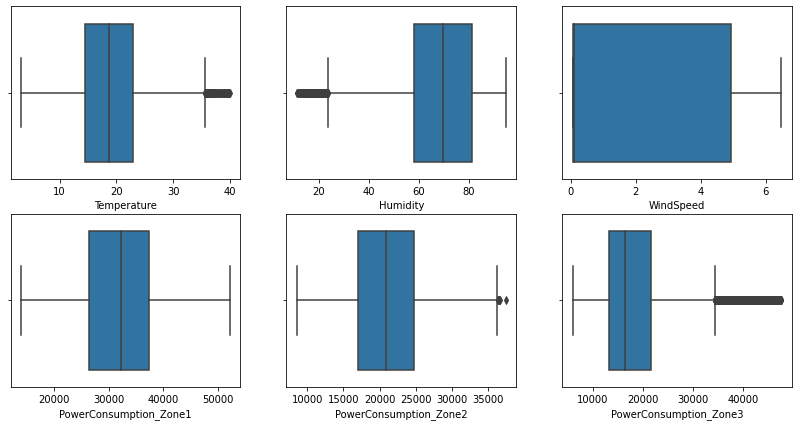

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=epower.Temperature)
sns.boxplot(ax=axes[0, 1], x=epower.Humidity)
sns.boxplot(ax=axes[0, 2], x=epower.WindSpeed)

sns.boxplot(ax=axes[1, 0], x=epower.PowerConsumption_Zone1)
sns.boxplot(ax=axes[1, 1], x=epower.PowerConsumption_Zone2)
sns.boxplot(ax=axes[1, 2], x=epower.PowerConsumption_Zone3)

Dapat dilihat pada diagram boxplot (diagram kotak garis) di atas, terdapat beberapa fitur numerik yang memiliki *outliers* seperti, `Temperature`, `Humidity`, `PowerConsumption_Zone2`, dan `PowerConsumption_Zone3`.

Untuk mengatasi *outliers*, dilakukan pendekatan menggunakan metode IQR (*Inter Quartile Range*).  

$IQR=Q3-Q1$  

Kemudian membuat batas bawah dan batas atas untuk mencakupi *outliers*.  

$batasBawah=Q1-1.5*IQR$  
$batasAtas=Q3-1.5*IQR$  

In [ ]:
Q1 = epower.quantile(0.25)
Q3 = epower.quantile(0.75)

IQR = Q3 - Q1

epower = epower[~((epower < (Q1 - 1.5*IQR)) | (epower > (Q3 + 1.5*IQR))).any(axis=1)]

epower.shape

(50931, 11)

Sehingga diperoleh data yang telah dibersihkan sebanyak 50931 sampel.

Melakukan pengecekan kembali terhadap *outliers* dengan menggunakan visualisasi boxplot.

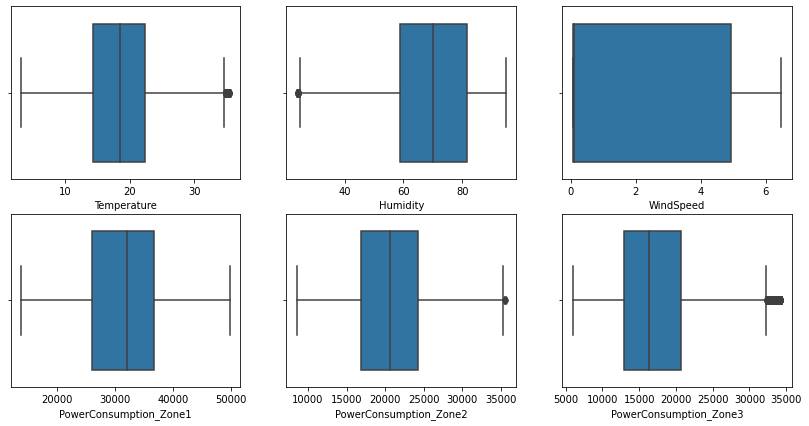

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=epower.Temperature)
sns.boxplot(ax=axes[0, 1], x=epower.Humidity)
sns.boxplot(ax=axes[0, 2], x=epower.WindSpeed)

sns.boxplot(ax=axes[1, 0], x=epower.PowerConsumption_Zone1)
sns.boxplot(ax=axes[1, 1], x=epower.PowerConsumption_Zone2)
sns.boxplot(ax=axes[1, 2], x=epower.PowerConsumption_Zone3)

Seletah dilakukan pembersihan *outliers* menggunakan metode IQR (*Inter Quartile Range*), dapat dilihat bahwa *outliers* telah berkurang pada boxplot di atas. Meskipun *outliers* masih ada pada fitur `Temperatur`, `Humidity`, `PowerConsumption_Zone2`, dan `PowerConsumption_Zone3`, tetapi masih dalam batas aman.

### 3.2.5 *Univariate Analysis*

Melakukan proses analisis data *univariate* pada fitur-fitur numerik.  

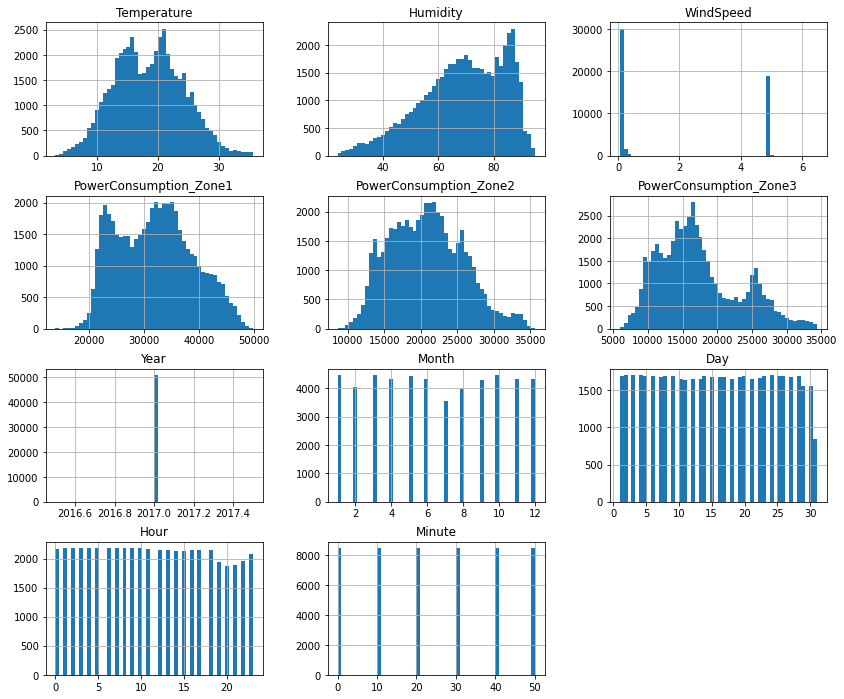

In [ ]:
epower.hist(bins=50, figsize=(14, 12))
plt.show()

Dari data histogram di atas diperoleh informasi, yaitu:
1.   Temperatur menunjukkan *zero-skewed* atau histogram simetris/normal.
2.   Lebih dari 50% data kecepatan angin mendekati nilai 0, dan sisanya berada pada nilai 5.
3.   Konsumsi daya pada stasiun Quads (Zona 1) sebagian besar berada pada rentang daya 21.000 hingga 40.000, dan paling banyak berada pada daya sekitar 22.500.
4.   Konsumsi daya pada stasiun Smir (Zona 2) sebagian besar berada pada rentang daya 12.500 hingga 27.500, dan paling banyak berada pada daya sekitar 16.500.
5.   Konsumsi daya pada stasiun Boussafou (Zona 3) sebagian besar berada pada rentang daya 9.000 hingga 17.500, dan rentang 24.000 hingga 26.000, serta paling banyak berada pada daya sekitar 14.000.
6.   Data diambil pada tahun 2017.

### 3.2.6 *Multivariate Analysis*

Melakukan visualisasi distribusi data pada fitur-fitur numerik dari *dataframe* `epower`. Visualisasi dilakukan dengan bantuan *library* `seaborn` `pairplot` menggunakan parameter `diag_kind`, yaitu `kde`, untuk melihat perkiraan distribusi probabilitas antar fitur numerik.

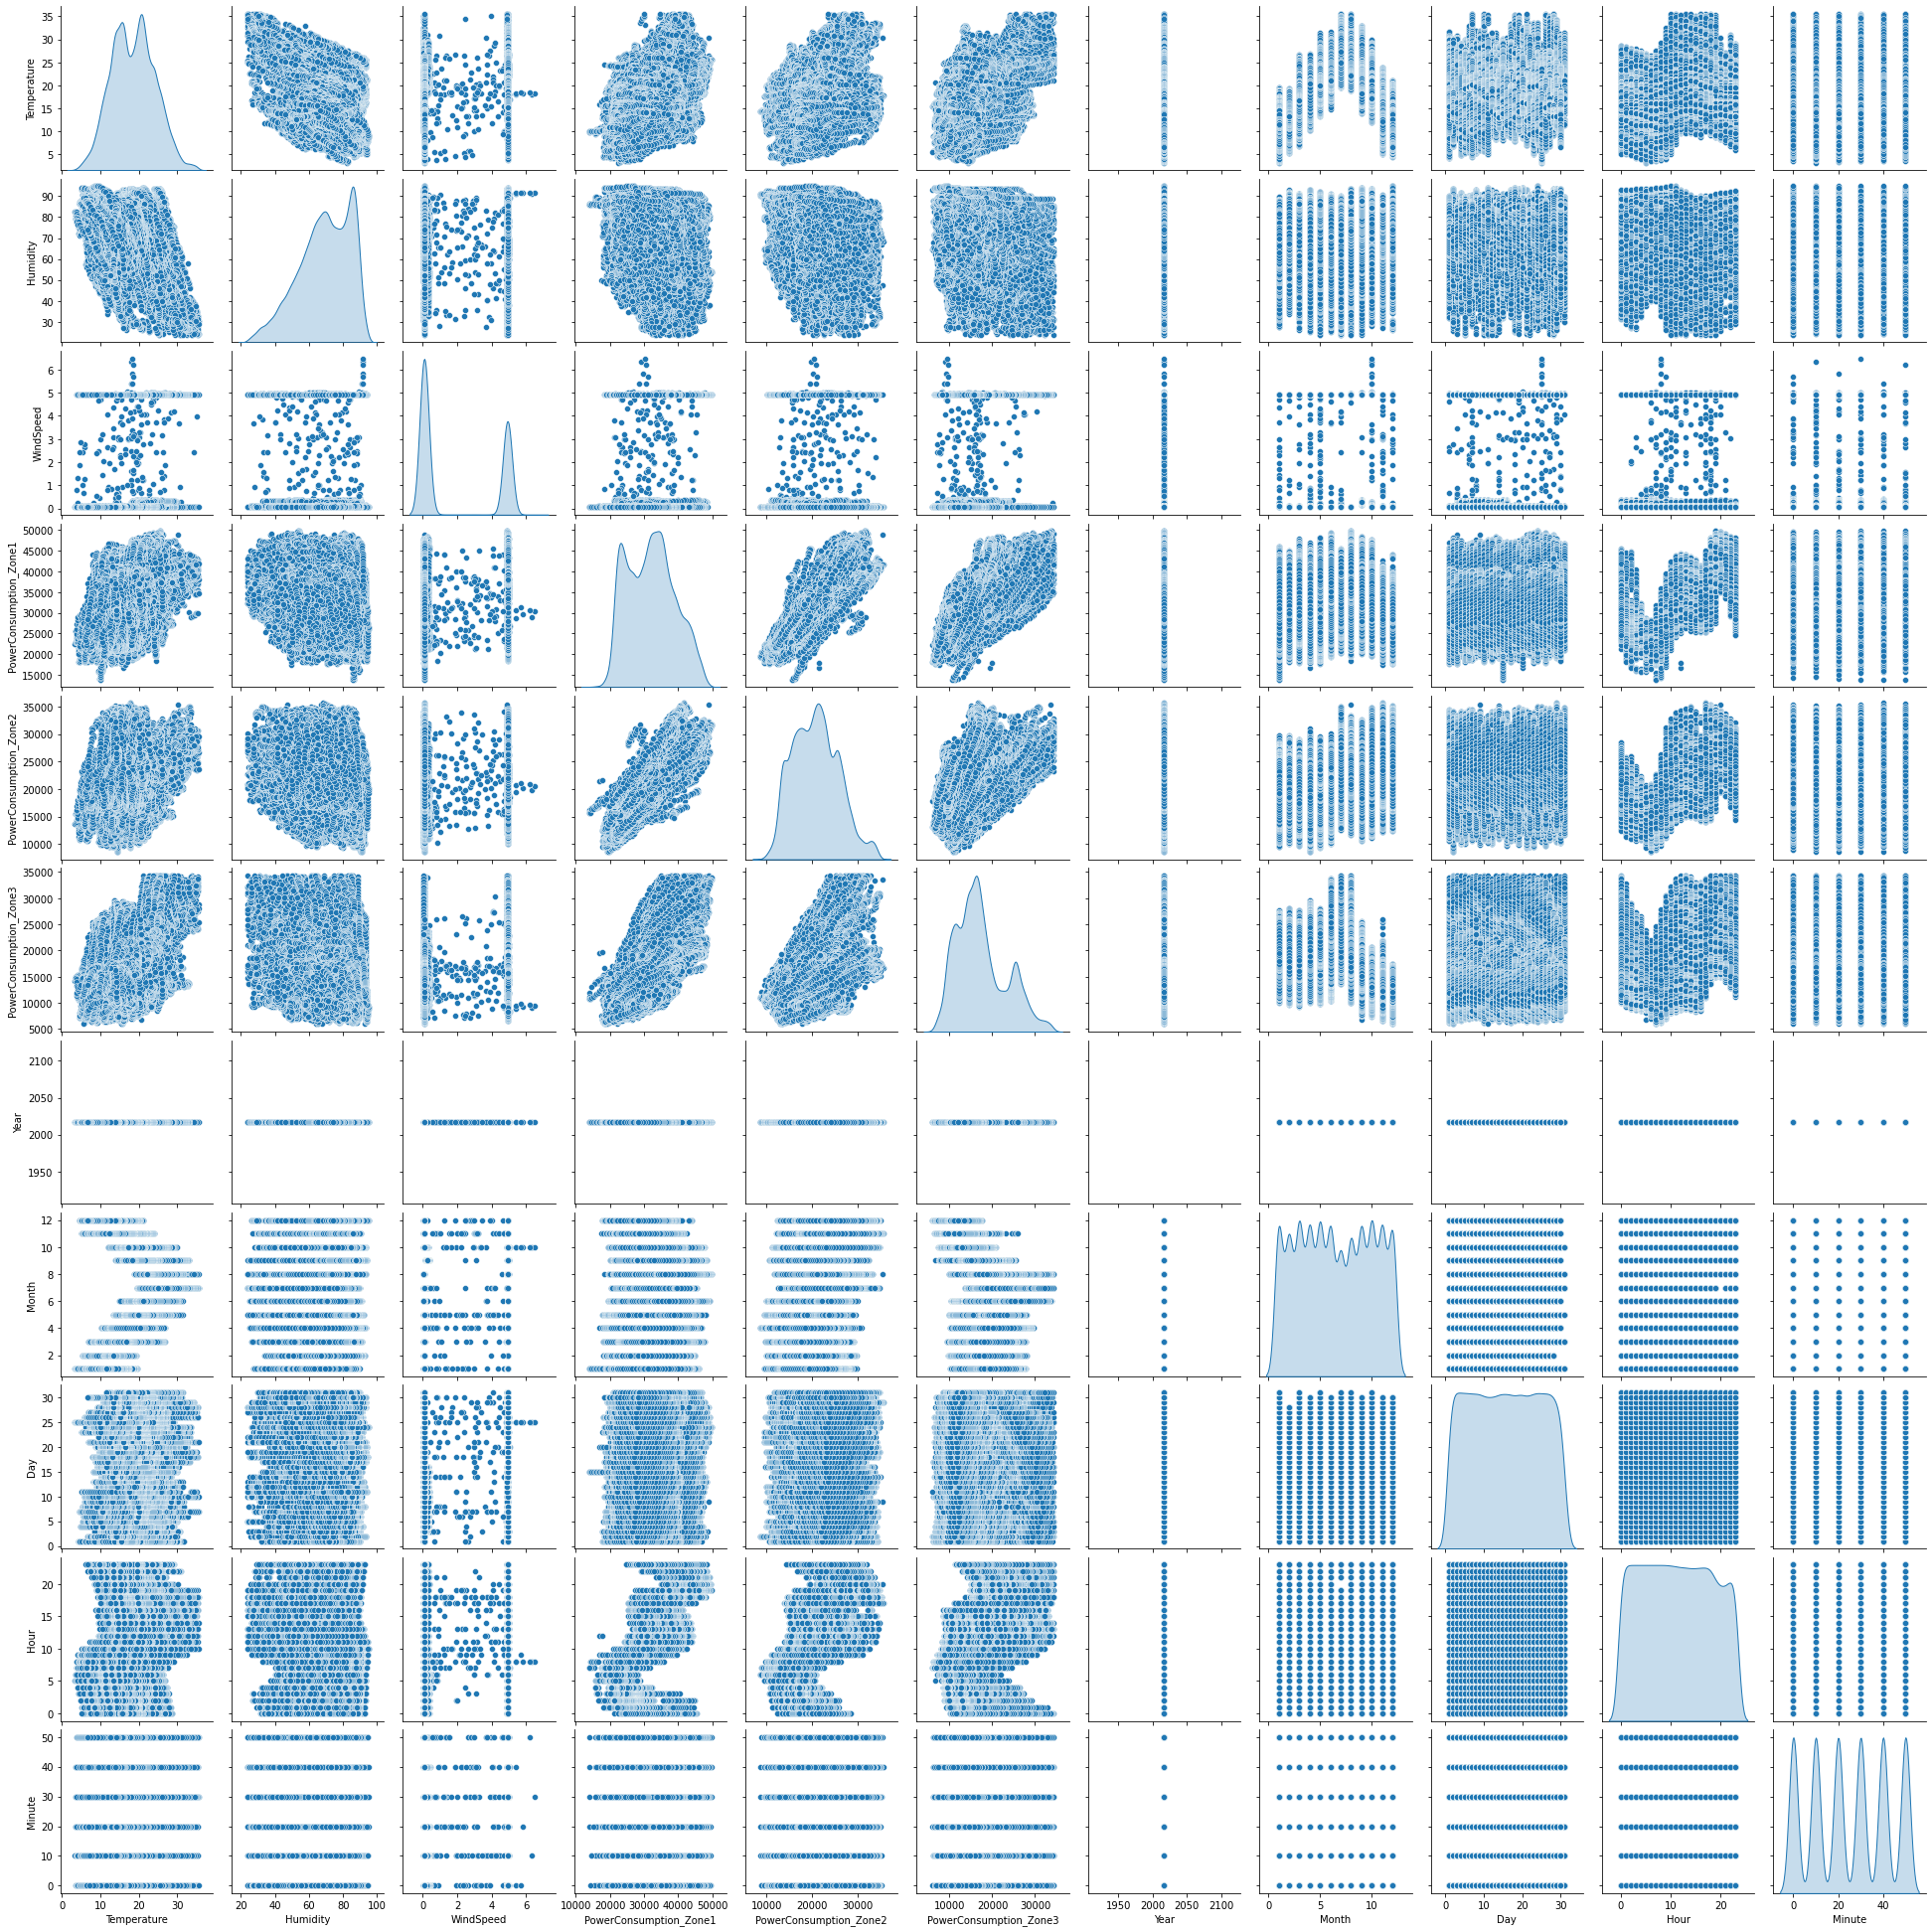

In [ ]:
sns.pairplot(epower, diag_kind='kde')

### 3.2.7 *Correlation Matrix* menggunakan *Heatmap*

Melakukan pengecekan korelasi antar fitur numerik dengan menggunakan visualisasi diagram *heatmap* *correlation matrix*.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

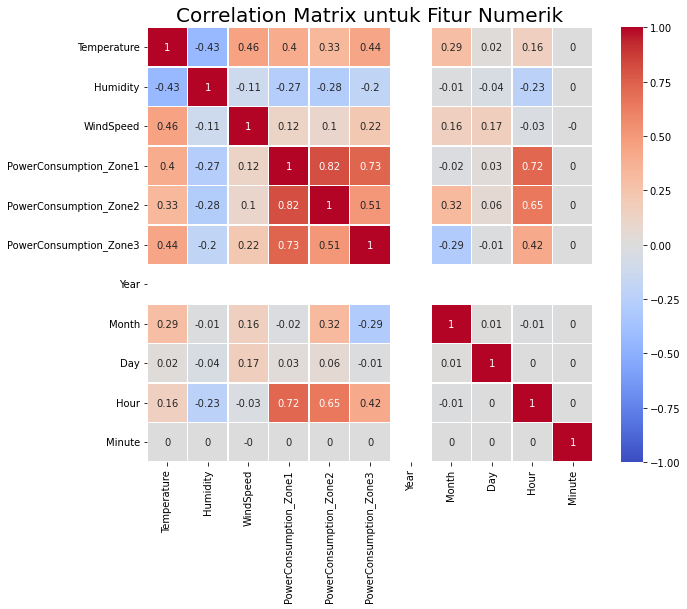

In [ ]:
plt.figure(figsize = (10, 8))
correlationMatrix = epower.corr().round(2)

sns.heatmap(
    data       = correlationMatrix,
    vmin       = -1,
    vmax       = 1,
    cmap       = 'coolwarm',
    annot      = True,
    linewidths = 0.5
)

plt.title('Correlation Matrix untuk Fitur Numerik', size=20)

Dapat dilihat pada diagram *heatmap* di atas memiliki *range* atau rentang angka dari 1.0 hingga 0.4 dengan keterangan sebagai berikut,
*   Jika semakin mendekati 1, maka korelasi antar fitur numerik semakin kuat bernilai positif.
*   Jika semakin mendekati 0, maka korelasi antar fitur numerik semakin rendah.
*   Jika semakin mendekati -1, maka korelasi antar fitur numerik semakin kuat bernilai negatif.

Jika korelasi bernilai positif, berarti nilai kedua fitur numerik cenderung meningkat bersama-sama.

Jika korelasi bernilai negatif, berarti nilai salah satu fitur numerik cenderung meningkat ketika nilai fitur numerik yang lain menurun.


### 3.2.8 Analisis Korelasi Antar Fitur

Fitur `PowerConsumption_Zone1` memiliki korelasi yang cukup kuat dengan fitur `Temperature`, `Humidity`, dan `Hour`.

Fitur `PowerConsumption_Zone2` memiliki korelasi yang cukup kuat dengan fitur `Temperature`, `Humidity`, `Month`, dan `Hour`.

Fitur `PowerConsumption_Zone3` memiliki korelasi yang cukup kuat dengan fitur `Temperature`, `Humidity`, `Month`, dan `Hour`.

Sehingga, fitur `WindSpeed`, `Year`, `Day`, dan `Minute` memiliki korelasi yang paling rendah dengan fitur `PowerConsumption_Zone1`, `PowerConsumption_Zone2`, dan `PowerConsumption_Zone3`. Dengan begitu, dapat dilakukan *drop* (menghapus) fitur-fitur tersebut.

In [ ]:
epower.drop(['WindSpeed'], inplace=True, axis=1)
epower.drop(['Year'],      inplace=True, axis=1)
epower.drop(['Day'],       inplace=True, axis=1)
epower.drop(['Minute'],    inplace=True, axis=1)
epower

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Temperature,Humidity,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month,Hour
0,6.559,73.8,34055.69620,16128.87538,20240.96386,1,0
1,6.414,74.5,29814.68354,19375.07599,20131.08434,1,0
2,6.313,74.5,29128.10127,19006.68693,19668.43373,1,0
3,6.121,75.0,28228.86076,18361.09422,18899.27711,1,0
4,5.921,75.7,27335.69620,17872.34043,18442.40964,1,0
...,...,...,...,...,...,...,...
52411,7.010,72.4,31160.45627,26857.31820,14780.31212,12,23
52412,6.947,72.6,30430.41825,26124.57809,14428.81152,12,23
52413,6.900,72.8,29590.87452,25277.69254,13806.48259,12,23
52414,6.758,73.0,28958.17490,24692.23688,13512.60504,12,23


# **4. *Data Preparation***

## 4.1 *Split Data*

Melakukan *define* atau mendefinisikan variabel `x` yang berisi fitur-fitur untuk memprediksi penggunaan daya (*power consumption*) dengan mengecualikan fitur yang tidak diperlukan, serta variabel `y` yang merupakan fitur target atau nilai yang akan diprediksi.

In [ ]:
x = epower.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1)
y = epower['PowerConsumption_Zone2']

Melakukan pembagian *dataset* (*split data*) dengan menggunakan `train_test_split` menjadi data latih (*training*) dan data uji (*testing*). Lalu menampilkan total *dataset* secara keseluruhan, total data latih (*training*), dan total data uji (*testing*).

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1, random_state=123)

print(f'Total seluruh sampel : {len(x)}')
print(f'Total data train     : {len(xTrain)}')
print(f'Total data test      : {len(xTest)}')

Total seluruh sampel : 50931
Total data train     : 45837
Total data test      : 5094


## 4.2 Standarisasi pada Fitur Numerik

Melakukan standarisasi nilai pada fitur numerik dengan menggunakan `StandardScaler` dari *library* `scikit-learn`. Proses standarisasi ini bertujuan untuk mencegah terjadinya penyimpangan nilai data yang cukup besar.

In [ ]:
numericalFeatures = ['Temperature', 'Humidity', 'Month', 'Hour']

scaler = StandardScaler()
scaler.fit(xTrain[numericalFeatures])
xTrain[numericalFeatures] = scaler.transform(xTrain.loc[:, numericalFeatures])
xTrain[numericalFeatures].head()

,Temperature,Humidity,Month,Hour
692,-1.078506,0.087513,-1.571849,1.123349
2092,-0.124126,-0.575845,-1.571849,0.104294
50052,-0.839911,0.388431,1.584701,0.395453
8444,0.082419,-1.560183,-1.284890,0.541032
45202,0.130494,-0.062946,1.297742,1.414507


In [ ]:
xTrain[numericalFeatures].describe().round(4)

,Temperature,Humidity,Month,Hour
count,45837.0000,45837.0000,45837.0000,45837.0000
mean,-0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-2.7207,-3.0106,-1.5718,-1.6427
25%,-0.7509,-0.6608,-0.9979,-0.9148
50%,-0.0030,0.0942,-0.1371,-0.0413
75%,0.7003,0.8565,1.0108,0.8322
max,3.0292,1.7392,1.5847,1.7057


`StandardScaler` akan melakukan proses standarisasi fitur dengan mengurangkan nilai rata-rata (`mean`) lalu membaginya dengan standar deviasi/simpangan baku (`std`) untuk menggeser distribusi nilai. Proses standarisasi akan menghasilakn distribusi dengan nilai rata-rata (`mean`) menjadi 0 dan nilai standar deviasi/simpangan baku (`std`) menjadi 1.

# **5. *Model Development***

## 5.1 *Model Preparation*

Mempersiapkan *dataframe* untuk melakukan analisis model dengan parameter `index`, yaitu `train_mse` dan `test_mse`, serta parameter `columns` yang merupakan algoritma yang akan digunakan untuk melakukan prediksi, yaitu algoritma K-Nearest Neighbor (KNN), Random Forest, dan Adaptive Boosting (AdaBoost).

In [ ]:
models = pd.DataFrame(
    index   = ['train_mse', 'test_mse'],
    columns = ['KNN', 'RandomForest', 'Boosting']
)

## 5.2 K-Nearest Neighbor (KNN) Algorithm

Algoritma K-Nearest Neighbor (KNN) akan menggunakan metode kemiripan dari data uji (*testing*) dan data latih (*training*) dengan mencari kesamaan pada fitur-fiturnya. K-Nearest Neighbor bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain berdasarkan sejumlah k-tetangga terdekat (k = nilai atau angka positif).

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(xTrain, yTrain)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred=knn.predict(xTrain), y_true=yTrain)

## 5.3 Random Forest Algorithm

Algoritma Random Forest merupakan algoritma *supervised learning* yang termasuk pada golongan *ensemble* (*group*) *learning*. Oleh karena itu, algoritma Random Forest terdiri dari beberapa model yang akan bekerja bersama-sama secara independen, dan prediksi dari setiap model ensemble akan digabungkan untuk membuat hasil prediksi akhir.

In [ ]:
rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(xTrain, yTrain)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=rf.predict(xTrain), y_true=yTrain)

## 5.4 Adaptive Boosting (AdaBoost) Algorithm

Algoritma Adaptive Boosting (AdaBoost) merupakan algoritma yang melatih model secara berurutan dan dalam proses iteratif (berulang). Data latih (training) akan memiliki *weight* atau bobot yang sama, kemudian model akan melakukan pemeriksaan atau observasi. Bobot yang lebih tinggi kemudian akan dimasukkan ke dalam model yang salah sehingga akan lanjut ke tahap selanjutnya. Proses iteratif tersebut akan berlanjut hingga model mencapai akurasi yang diinginkan.

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(xTrain, yTrain)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(xTrain), y_true = yTrain)

# **6. *Model Evaluation***

Melakukan standarisasi atau *scaling* pada fitur numerik data uji (*testing*) sehingga rata-rata (*mean*) bernilai 0, dan varians bernilai 1.

In [ ]:
xTest.loc[:, numericalFeatures] = scaler.transform(xTest[numericalFeatures])

Melakukan evaluasi dari ketiga model, yaitu algoritma K-Nearest Neighbor, Random Forest, dan Adaptive Boosting (AdaBoost) untuk masing-masing data latih (*training*) dan data uji (*testing*) dengan melihat tingkat *error*-nya menggunakan Mean Squared Error (MSE).

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

modelDict = {
    'KNN'     : knn,
    'RF'      : rf,
    'Boosting': boosting
}

for name, model in modelDict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=yTrain, y_pred=model.predict(xTrain))/1e3
    mse.loc[name, 'test']  = mean_squared_error(y_true=yTest,  y_pred=model.predict(xTest))/1e3

mse

,train,test
KNN,1494.040003,1799.485296
RF,583.134092,1542.597399
Boosting,7602.368447,7436.213685


Melakukan visualisasi data *error* setiap model dengan algoritma K-Nearest Neighbor, Random Forest, dan Adaptive Boosting (AdaBoost) untuk masing-masing data latih (*training*) dan data uji (*testing*) dengan menggunakan plot *bar chart*.

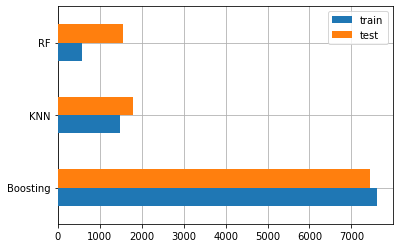

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari visualisasi diagram di atas dapat disimpulkan bahwa,
1.   Model dengan algoritma Random Forest memberikan nilai *error* yang paling kecil, yaitu sebesar 583.1 pada *training error*, dan 1542.6 pada *testing error*.
2.   Model dengan algoritma K-Nearest Neighbor memiliki tingkat *error* yang sedang di antara dua algoritma lainnya.
3.   Model dengan algoritma Adaptive Boosting mengalami *error* yang paling beser dengan nilai *training error* sebesar 7602.37, dan nilai *testing error* sebesar 7436.21.

Melakukan pengujian prediksi dengan menggunakan beberapa nilai konsumsi daya (*power consumption*) dari data uji (*testing*)

In [ ]:
prediksi  = xTest.iloc[:1].copy()
pred_dict = {'y_true': yTest[:1]}

for name, model in modelDict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
31172,28507.28617,30042.3,28308.5,24396.8


Dapat dilihat prediksi pada model dengan algoritma Random Forest memberikan hasi yang paling mendekati dengan nilai `y_true` jika dibandingkan dengan algoritma model yang lainnya.

Nilai `y_true` sebesar **28507** dan nilai prediksi `Random Forest` sebesar **28308**.

Kesimpulannya adalah model yang digunakan untuk melakukan prediksi penggunaan daya listrik (*electric power consumption*) menghasilkan **tingkat *error* yang paling rendah** dengan menggunakan **algoritma Random Forest** pada model yang telah dibangun.